In [45]:
%load_ext autoreload
%autoreload 2
from argparse import Namespace
from types import SimpleNamespace
from torch.autograd import Variable
import utils
import torch
import torch.nn as nn

from utils import plot_reconstr, plot_rec, plot_analogy, get_normalized_dataloader, get_initialized_network, tensor_seq_to_img
from train_drnet import get_optimizers

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
opt = SimpleNamespace(
    lr=0.002,
    beta1=0.5,
    batch_size=50,
    log_dir="logs",
    data_root="/data/datasets",
    optimizer="adam",
    niter=200,
    seed=1,
    epoch_size=600,
    content_dim=128,
    pose_dim=35,
    image_width=128,
    channels=3,
    dataset="kth",
    max_step=20,
    sd_weight=100,
    sd_nf=100,
    content_model="dcgan_unet",
    pose_model="dcgan",
    data_threads=5,
    normalize=False,
    data_type="drnet",
    pose=True
)

In [47]:
# load dataset
train_loader, test_loader = utils.get_normalized_dataloader(opt)
test_loader = iter(test_loader)

# get networks, criterions and optimizers
netEC, netEP, netD, netC = utils.get_initialized_network(opt)
models = (netEC, netEP, netD, netC)
for model in models:
    model.cuda()

mse_criterion = nn.MSELoss()
bce_criterion = nn.BCELoss()
criterions = (mse_criterion, bce_criterion)
for criterion in criterions:
    criterion.cuda()

# optimizer should be constructed after moving net to the device
optimizerEC, optimizerEP, optimizerD, optimizerC = get_optimizers(opt, models)
optimizers = (optimizerEC, optimizerEP, optimizerD, optimizerC)

using external pose
using external pose


In [48]:
for model in models:
    model.eval()

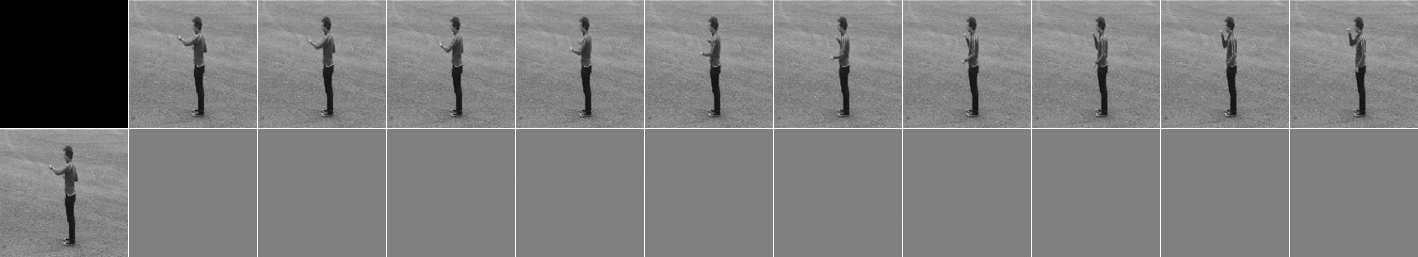

In [49]:
# using the same video as original and content
x = next(test_loader)
plot_reconstr(opt.pose, models, x, x)